# Семинар 4. Агрегирование и сортировка.

**Импорт библиотек:**

In [1]:
import numpy as np

## Агрегирование

Согласно одному из возможных определений, агрегированием называется объединение объединение элементов по определенному правилу. В нашем случае, в роли правил объединения будут выступать различные математические операции, например, сумма, произведение или вычсление максимума. Операции агрегирования являются весьма важными операциями, поскольку в большом количестве различных алгоритмов так или иначе приходится суммировать различные данные, вычислять максимумы и минимумы. Также большое количество агрегирующих операций используется в статистике и науке о данных при вычислении сводных показателей: среднего, медианы, среднеквадратичного отклонения и т.д.

Из вышесказанного следует полезность агрегирующих операций, а из полезности этих операций следует их наличие в NumPy.

### Суммы и произведения

Мы уже видели возможности нахождения суммы или произведения элементов массива с помощью агрегирующих методов соответствующих векторизованных операций. Однако, есть более удобный и гибкий способ вычисления, как простых сумм/произведений элементов, так и их комулятивных вариантов:

In [2]:
array = np.random.randint(-10, 10, size=9)
print(f"{array = }")

print(
    f"sum: {np.sum(array)};",
    f"prod: {np.prod(array)};",
    f"cumulative sum: {np.cumsum(array)};",
    f"cumulative prod:\n{np.cumprod(array)}",
    sep="\n",
)

array = array([ -4,   9,  -5,   3, -10,   7,  -9,   4,   6])
sum: 1;
prod: 8164800;
cumulative sum: [-4  5  0  3 -7  0 -9 -5  1];
cumulative prod:
[     -4     -36     180     540   -5400  -37800  340200 1360800 8164800]


### Сводные показатели

Также в NumPy есть возможность вычислять сводные показатели массива данных. К числу таких показателей относятся максимумы/минимумы, среднее значение, медиана, среднеквадратичное отклонение.

In [3]:
array = np.random.randint(-10, 10, size=9)
print(f"{array = }")

print(
    f"min: {np.min(array)};",
    f"max: {array.max()};",
    f"mean: {np.mean(array)};",
    f"median: {np.median(array)};",
    f"std: {np.std(array)};",
    f"variance: {np.var(array)};",
    sep="\n",
)

array = array([  3,   5,  -2, -10,   5,   1,  -6,  -7,  -3])
min: -10;
max: 5;
mean: -1.5555555555555556;
median: -2.0;
std: 5.123174170399335;
variance: 26.246913580246915;


### Булево агрегирование

Также мы можем агрегировать массивы, используя значения их элементов в булевом контексте с помощью специальных функций `all` и `any`, которые очень похожи на свои аналоги в "чистом" Python.

In [3]:
array = np.random.randint(-10, 10, size=9)
print(f"{array = }")

print(
    f"all: {array.all()};",
    f"any: {np.any(array)};",
    sep="\n",
)

array = array([  1,  -2,   5,   5,   4, -10,  -3,   0,   5])
all: False;
any: True;


### Позиционирование

В ряде задач важно не столько важно найти значение экстремума, сколько найти его положение. Например, знание информации о положении экстремума в массиве может оказаться очень полезным при визуализации содержимого массива. Рассмторим пример, пусть нам дан одномерный массив, описывающий значения некоторой функции на заданном отрезке. При визуализации этого массива мы бы хотели явно отметить точку максимума на рисунке. Для это цели мы будем использовать специальную функцию `argmax()`, которая позволяет найти позицию максимального элемента. В NumPy также существует аналогичная функция для поиска минимального элемента (угадайте, как она называется). 

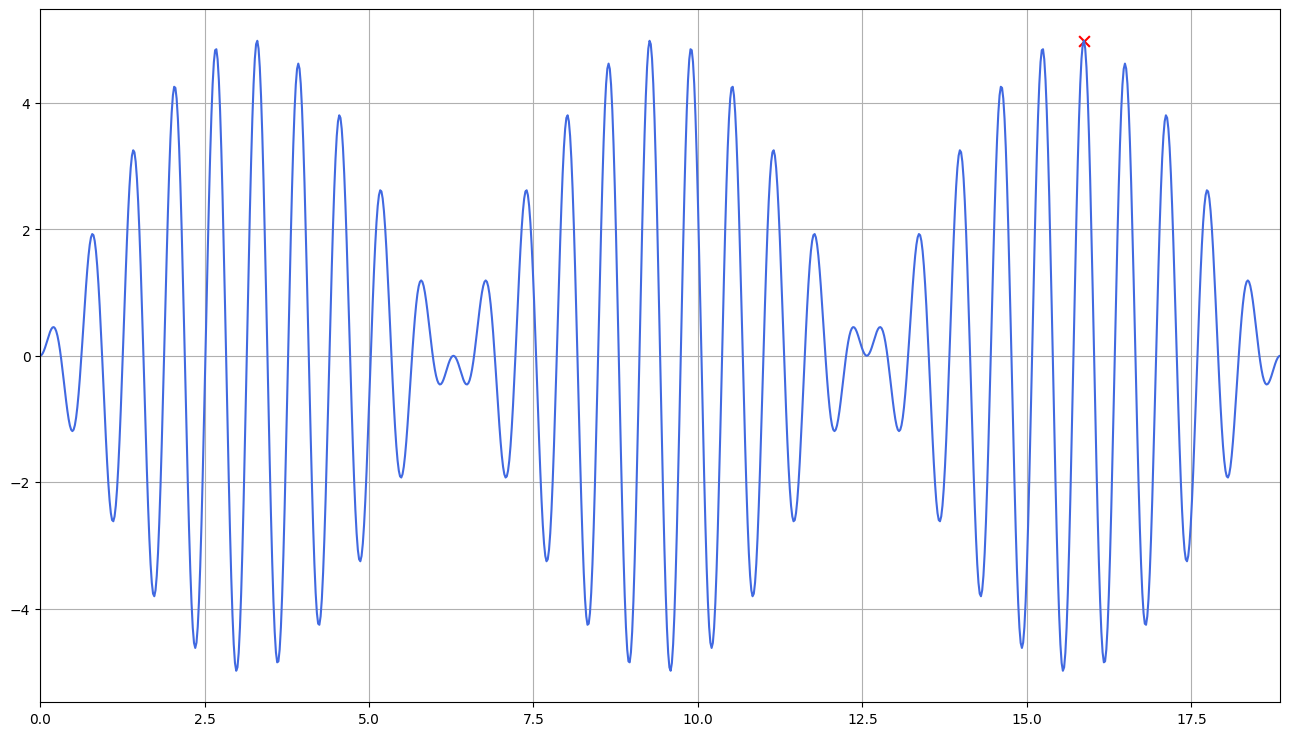

In [4]:
from utils import visualize_1d


time = np.linspace(0, np.pi * 6, 1000)
signal_high_freq = np.sin(time * 10)
signal = 5 * np.sin(time * 0.5) * signal_high_freq

extremum = [(time[np.argmax(signal)], np.max(signal))]
visualize_1d(time, signal, extremum)

Аналогично мы можем найти позицию экстремума и в многомерном массиве, однако, здесь есть небольшой нюанс.

In [6]:
array = np.random.randint(-10, 10, size=(4, 4))
print(f"array:\n{array}", end="\n\n")

position_min = np.argmin(array)
print(f"{position_min = }")

array:
[[ -3   3  -2  -7]
 [  1   1  -7 -10]
 [  7  -1   3   4]
 [ -8  -4   7  -3]]

position_min = 7


В примере выше мы получили одно число вместо ожидаемой позиции минимального элемента в двумерном массиве. Но почему? Все дело в том, что для упрощения поиска, NumPy сначала "вытягивает" многомерный массив в одномерны. Т.е. фактически, в примере выше произашло следующее:

In [7]:
array_flatten = array.flatten()
print(f"array_flatten:\n{array_flatten}", end="\n\n")

print(f"elem min: {array_flatten[position_min]}")

array_flatten:
[ -3   3  -2  -7   1   1  -7 -10   7  -1   3   4  -8  -4   7  -3]

elem min: -10


Теперь мы понимаем, как именно была посчитана позиция минимального элемента в случае двумерного массива. Однако от этого легче нам не становится, ведь мы по прежнему не знаем индексы минимума в двумерном массиве. В этом случае мы, конечно, могли бы написать функцию для перевода индекса одномерного массива в индексы колонок и столбцов двумерного массива, которые соответствуют минимальному элементу. Но что делать если мы имеем дело с четырехмерным массивом? А с восьмимерным? Неужели нам придется писать функции перевода для каждого случая?

На самом деле нет, ведь в NumPy все уже давно реализовано:

In [8]:
position_min_2d = np.unravel_index(position_min, shape=array.shape)
print(f"position_min = {position_min_2d}")

position_min = (1, 3)


Стоит иметь в виду описанyю особенность при работе с многомерными массивами и не забывать о функции `unravel_index`.

### Замечание

Большая часть функций, описанных выше, является аналогами соответствующих функций в "чистом" Python, однако, не стоит считать, что они взаимозаменяемы. Во-первых, аналоги из Python будут работать значительно медленнее функций из NumPy в силу причин, которые были рассмотрены на предыдущих семинарах. Во-вторых, функции Python не умеют корректно работать с многомерными массивами, в отличие от функций NumPy. Более того, функции NumPy позволяют настраивать агрегирование, о чем мы поговорим далее.

## Агрегирование по измерениям

Во всех примерах выше мы применяли операции агрегирования к одномерным массивам. Однако, как было сказано в предыдущем абзаце, мы можем применять указанные операции и к многомерным массивам.

In [9]:
array = np.random.randint(-10, 10, size=(3, 4))
print(f"array:\n{array}", end="\n\n")

print(
    f"sum: {np.sum(array)};",
    f"cumulative sum: {np.cumsum(array)};",
    f"max: {np.max(array)};",
    sep="\n",
)

array:
[[ 5  6  2 -2]
 [ 7 -5 -4  3]
 [ 2  0  0  4]]

sum: 18;
cumulative sum: [ 5 11 13 11 18 13  9 12 14 14 14 18];
max: 7;


Как вы видите, в этом случае операция будет применяться ко всем массиву, игнорируя его пространственные данные. Однако, с помощью специального аргумента `axis` вы можете выбирать осуществлять настройку - выбирать, по каким именно измерениям массива применять операцию. Рассмотрим эти возможности на примере функции `sum`, поскольку поведение остальных функций в контексте выполнения по измерениям, не будет отличаться.

In [10]:
array = np.random.randint(-10, 10, size=(3, 4))
print(f"array:\n{array}", end="\n\n")

print(
    f"sum whole: {np.sum(array)};",
    f"sum per column: {np.sum(array, axis=0)};",
    f"sum per row: {np.sum(array, axis=1)};",
    sep="\n",
)

array:
[[-8  3 -4  6]
 [ 6  8 -1  2]
 [-7 -2  5 -8]]

sum whole: 0;
sum per column: [-9  9  0  0];
sum per row: [ -3  15 -12];


Как вы видите, теперь у нас есть возможность вычислять агрегации по определнным измерениям. Обращаем ваше внимание на то, массив "схлопывается" вдоль указанных измерений массива, а результирующий массив имеет меньшую размерность, при этом сохраняя свои исходные размеры вдоль оставшихся измерений. При необходимости вы можете сохранить и размерность исходного массива, однако размер вдоль агрегированного измерения все равно будет "схлопнут".

In [11]:
print(f"sum per column: {np.sum(array, axis=0, keepdims=True)};")

sum per column: [[-9  9  0  0]];


Сохранение размерности бывает очень полезным, особенно при использовании результирующего массива в векторизованных операциях с применением трансляции.

Помимо указания измерение в виде целых неотрицательных чисел, вы можете задавать измерения агрегации с помощью кортежей, в этом случае агрегация будет происходить вдоль указанных измерений. Также вы можете использовать отрицательное число `-1`, в этом случае агрегация будет осуществлена по последнему измерению массива. 

In [12]:
array = np.random.randint(-10, 10, size=(2, 3, 2))
print(f"array:\n{array};", end="\n\n")

print(
    f"axis negative:\n{np.sum(array, axis=-1)}",
    f"axis tuple:\n{np.sum(array, axis=(0, 2))}",
    f"axis tuple keepdim:\n{np.sum(array, axis=(0, 2), keepdims=True)}",
    sep="\n\n",
)

array:
[[[-10  -1]
  [  7  -9]
  [ -3  -3]]

 [[  4   8]
  [  4   4]
  [ -8   6]]];

axis negative:
[[-11  -2  -6]
 [ 12   8  -2]]

axis tuple:
[ 1  6 -8]

axis tuple keepdim:
[[[ 1]
  [ 6]
  [-8]]]


## Задача 1. Нормировка

![radar-data](./images/radar_data.png)

При решении ряда задач на том или ином этапе необходимо осуществить нормировку данных. Так, например, при работе с моделями глубинного обучения входные данные нормируют так, чтобы результат нормировки был распределен по нормальному закону распределения. Это позволяет решить проблему внутреннего сдвига. Еще один пример использования нормировок - нормировка радиолокационных изображений.

Зачастую радиолокационные изображения в "чистом" виде очень тяжело читать и интерпретировать, поскольку они содержат значения очень низкой яркости. Чтобы увеличить читабельность и интерпретируемость изображений необходимо осуществить нормировку. В этом задании мы с вами посмотрим на различные алгоритмы нормировки радиолокационных изображений.

Необходимо реализовать три класса-функтора, соответствующих нормировки на глобальный диапазон значений, построчной нормировке на диапазон и логарифмической сортировке.

**Нормировка на диапазон**:

Нормировка на диапазон осуществляется следующим образом:

$$val^{ij}_{normalized} = \frac{val^{ij} - image_{min}}{image_{max} - image_{min}}$$

В данной формуле значение $val^ij$ соответствует значению ij-ого пикселя изображения, а значения $image_{max}$, $image_{min}$ - глобальный максимум и минимум изображения, соответственно.

**Построчная нормировка на диапазон**:

Построчная нормировка на диапазон похоже по своей структура на предыдущую нормировку:

$$val^{ij}_{normalized} = \frac{val^{ij} - image^{i}_{min}}{image^{i}_{max} - image^{i}_{min}}$$

Отличие заключается в том, что теперь значения пикселей в определенной строке нормируются на диапазон значений именно этой строки.

**Логарифмическая нормировка**:

Логарифмическая нормировка выглядит следующим образом:

$$\begin{equation*}
val^{ij}_{normalized} = 
 \begin{cases}
   log_{10}{val^{ij}} & val^{ij} \neq 0\\
   0 & val^{ij} = 0
 \end{cases}
\end{equation*}$$

После этого все полученные значения смещаются вправо на значение минимального отрицательного элемента.

Итак, ваша задача реализовать описанные нормировки в виде классов-функторов. На вход функтор принимает массив чисел с плавающей точкой. На выходе возвращается новый массив с нормированными элементами. Причем возвращаемый массив должен иметь тип данных `np.uint8` и значения в диапазоне от 0 до 255. Т.е. после осуществления нормировки вам придетеся перевести значения из полученного диапазона на отрезок $[0, 255]$.

**Замечание:** вам может пригодиться метод `astype` или функция `np.uint8`.  
**Важно:** использование циклов запрещено.

**Необходимые импорты:**

In [13]:
import json
import os

from utils import visualize_images

**Функторы:**

In [14]:
class RangeNormalizer:
    _name: str

    def __init__(self) -> None:
        self._name = "range"

    def __call__(self, array: np.ndarray) -> np.ndarray:
        # ваш код
        return (array).astype(np.uint8)
    
    @property
    def name(self) -> str:
        return self._name

In [15]:
class RowRangeNormalizer:
    _name: str

    def __init__(self) -> None:
        self._name = "row-range"

    def __call__(self, array: np.ndarray) -> np.ndarray:
        # ваш код
        return (array).astype(np.uint8)

    @property
    def name(self) -> str:
        return self._name

In [16]:
class LogNormalizer:
    _name: str

    def __init__(self) -> None:
        self._name = "log"

    def __call__(self, array: np.ndarray) -> np.ndarray:
        # ваш код
        return (array).astype(np.uint8)
    
    @property
    def name(self) -> str:
        return self._name

**Тесты:**

In [17]:
path_to_radar_data = os.path.join("data", "radar_data.json")
assert os.path.exists(path_to_radar_data)

with open(path_to_radar_data, "r") as file:
    radar_data = np.array(json.load(file), dtype=np.float64)

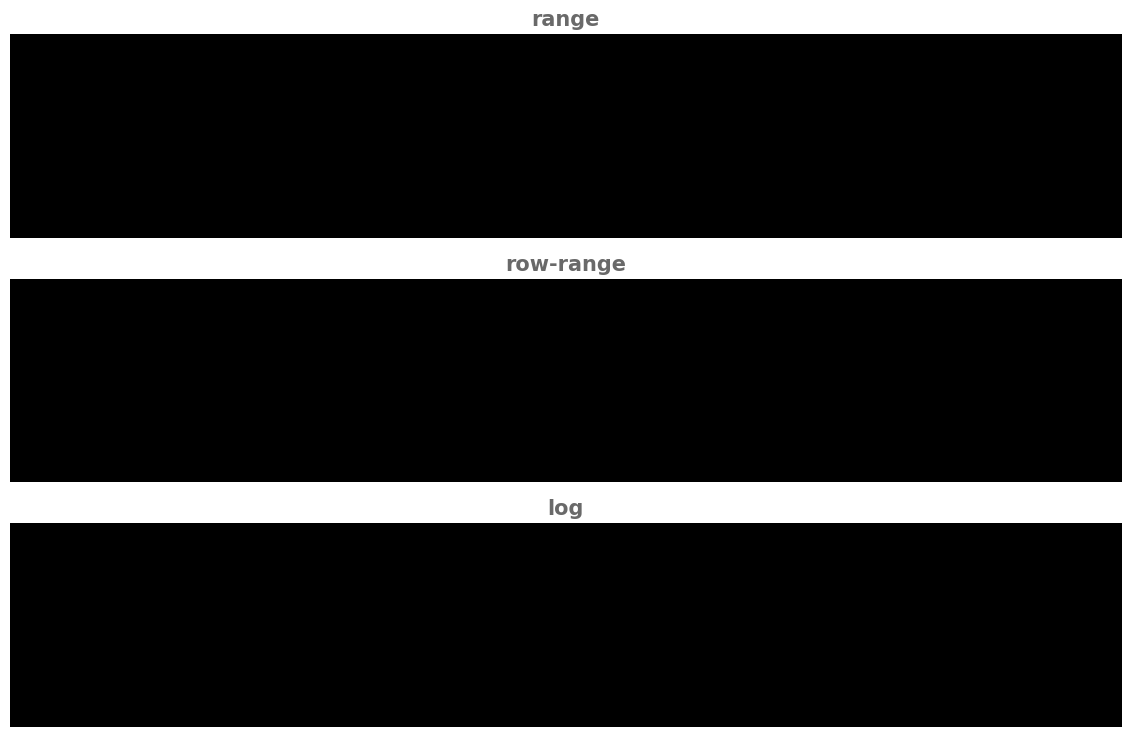

In [18]:
normalizers = [RangeNormalizer(), RowRangeNormalizer(), LogNormalizer()]
images_normalized = {}

for normalizer in normalizers:
    image_normalized = normalizer(radar_data)
    assert radar_data is not image_normalized
    assert image_normalized.dtype.type is np.uint8

    images_normalized[normalizer.name] = image_normalized

visualize_images(images_normalized)

## Сортировки

### Сортировка

Из курса по алгоритмам и структурам данных вам должна быть известна важность алгоримов сортировки. Зачастную сортировка является полезной как сама по себе, так и как шаг в более глобальных алгоритмах. Именно поэтому в NumPy реализована возможность сортировки массивов. Подобно "чистому" Python функции сортировки существуют в двух состояниях: как отдельная функция, которая создает новый массив с отсортированными значениями, и как метод массива, который осуществляет сортировку на месте. 

In [19]:
array = np.random.randint(-10, 10, size=10)
print(f"array:\n{array}", end="\n\n")

array_sorted = np.sort(array)
print(
    f"array original:\n{array}",
    f"array sorted:\n{array_sorted}",
    f"array_sorted is array: {array_sorted is array}",
    sep="\n",
    end="\n\n"
)

array.sort()
print(f"array:\n{array}", end="\n\n")

array:
[ -1   2  -9  -1   1   1 -10  -4  -5   1]

array original:
[ -1   2  -9  -1   1   1 -10  -4  -5   1]
array sorted:
[-10  -9  -5  -4  -1  -1   1   1   1   2]
array_sorted is array: False

array:
[-10  -9  -5  -4  -1  -1   1   1   1   2]



В отличие от функций Python данные функции имеют ряд интересных особенностей, помимо разницы в производительности. С одной из таких особенностей мы уже знакомы: возможность применения операции вдоль определенного измерения.

In [20]:
array = np.random.randint(-10, 10, size=(3, 4))
print(f"array:\n{array}", end="\n\n")

print(
    f"default sort:\n{np.sort(array)}",
    f"per row sort:\n{np.sort(array, axis=-1)}",
    f"per column sort:\n{np.sort(array, axis=0, kind='quicksort')}",
    sep="\n\n",
)

array:
[[ 4 -3 -9 -2]
 [-9  8 -1  9]
 [ 1 -8  9 -7]]

default sort:
[[-9 -3 -2  4]
 [-9 -1  8  9]
 [-8 -7  1  9]]

per row sort:
[[-9 -3 -2  4]
 [-9 -1  8  9]
 [-8 -7  1  9]]

per column sort:
[[-9 -8 -9 -7]
 [ 1 -3 -1 -2]
 [ 4  8  9  9]]


Следующая интересная особенность функций сортировки - возможность выбора алгоритма сортировки. Если в Python функции сортировки использоваль тимсорт, то в NumPy вы можете выбрать подходящий для конкретной задачи алгоритм, передав в функции параметр `kind`. На выбор доступны следующие варианты: *quicksort*, *mergesort*, *heapsort*, *stable*.

### Сортировка индексов

Помимо обычных сортировок в NumPy реализована возможность вычисления сортировки по аргументу, т.е. существуют специальные функции, которые вычисляет не отсортированный массив, а массив индексов. Индексы расположены так, как соответствующие им элементы должны были бы располагаться в отсортированном массиве, при этом сам массив изменений не претерпевает.

In [21]:
array = np.random.randint(-10, 10, size=10)
print(f"array:\n{array}", end="\n\n")

indices = np.argsort(array)
print(
    f"array:\n{array}",
    f"indices:\n{indices}",
    f"array sorted:\n{array[indices]}",
    sep="\n",
)

array:
[-9 -7  3  5 -1  9  2 -7 -5 -3]

array:
[-9 -7  3  5 -1  9  2 -7 -5 -3]
indices:
[0 1 7 8 9 4 6 2 3 5]
array sorted:
[-9 -7 -7 -5 -3 -1  2  3  5  9]


Данная функция также может быть использована вдоль определенных измерений массива.

In [22]:
array = np.random.randint(-10, 10, size=(3, 4))
print(f"array:\n{array}", end="\n\n")

print(
    f"default sort:\n{np.argsort(array)}",
    f"per row sort:\n{np.argsort(array, axis=-1)}",
    f"per column sort:\n{np.argsort(array, axis=0)}",
    sep="\n"
)

array:
[[-9 -4  8  0]
 [-2 -8  8 -8]
 [ 0 -1 -2  5]]

default sort:
[[0 1 3 2]
 [1 3 0 2]
 [2 1 0 3]]
per row sort:
[[0 1 3 2]
 [1 3 0 2]
 [2 1 0 3]]
per column sort:
[[0 1 2 1]
 [1 0 0 0]
 [2 2 1 2]]


Обратите ваше внимание, что сортировка осуществляется в порядке неубывания, а аргумент `reverse` отсутствует. Подумайте о возможных способах реализации сортировки в порядке невозрастания с помощью операций NumPy.